<a href="https://colab.research.google.com/github/RafinEazdan/Deep_Learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PCA

(1797, 8, 8)


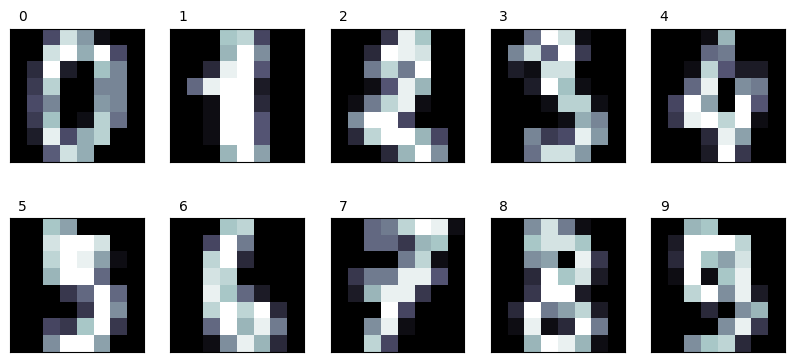

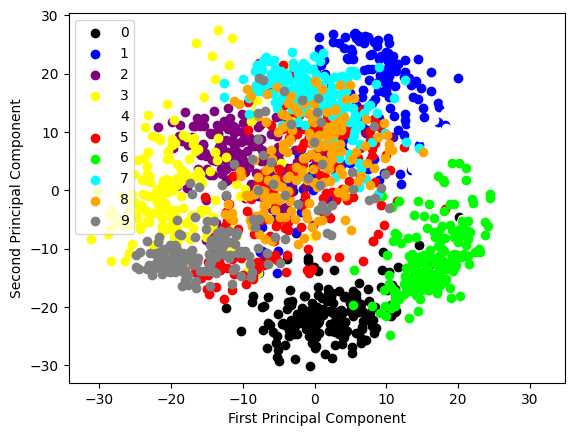

In [2]:
import numpy as np
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from sklearn.datasets import load_digits

digits = load_digits()
X_digits, y_digits = digits.data, digits.target

print(digits.images.shape)

n_row, n_col, max_n = 2, 5, 10

fig = plt.figure(figsize=(2. * n_col, 2.26 * n_row))
i=0

while i < max_n and i < digits.images.shape[0]:
	p = fig.add_subplot(n_row, n_col, i + 1, xticks=[],
	yticks=[])
	p.imshow(digits.images[i], cmap=plt.cm.bone,interpolation='nearest')
	#label the image with the target value
	p.text(0, -1, str(digits.target[i]))
	i = i + 1

plt.show()

estimator = PCA(n_components=10)
X_pca = estimator.fit_transform(X_digits)

colors = ['black', 'blue', 'purple', 'yellow', 'white','red', 'lime', 'cyan', 'orange', 'gray']

for i in range(len(colors)):
	px = X_pca[:, 0][y_digits == i]
	py = X_pca[:, 1][y_digits == i]
	plt.scatter(px, py, c=colors[i])
	plt.legend(digits.target_names)
	plt.xlabel('First Principal Component')
	plt.ylabel('Second Principal Component')

plt.show()



K-means

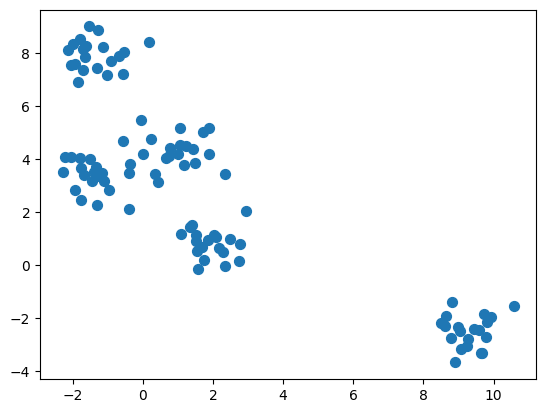

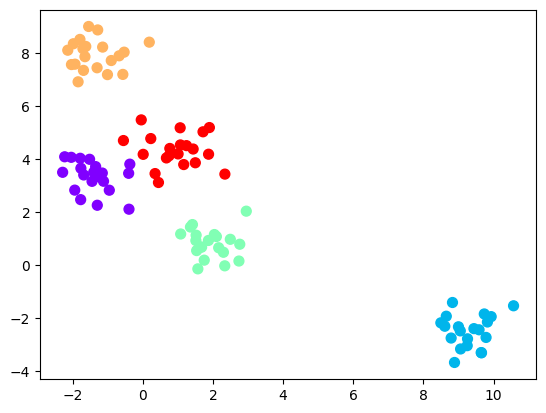

In [8]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

x,y = make_blobs(n_samples=100,centers=5,random_state=0,cluster_std=0.6)
plt.scatter(x[:,0],x[:,1],s=50)

plt.show()

est = KMeans(5)
est.fit(x)
y_kmeans = est.predict(x)

plt.scatter(x[:,0],x[:,1],c=y_kmeans, s=50,cmap='rainbow')
plt.show()

Text Clustering

In [11]:
!pip install nltk

In [15]:
# Alternative approach - download all necessary components
import nltk

# Download all necessary data for tokenization
nltk.download('punkt')
nltk.download('stopwords')

# Rest of the code remains the same

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [17]:
import collections
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt_tab', quiet=True)
nltk.download('punkt', quiet=True)
nltk.download('stopwords', quiet=True)

# Tokenizer function
def tokenizer(text):
    tokens = word_tokenize(text)
    stemmer = PorterStemmer()
    stop_words = set(stopwords.words('english'))  # Convert to set for efficiency
    return [stemmer.stem(t) for t in tokens if t.lower() not in stop_words and t.isalpha()]  # Keep only words

# Function to cluster sentences
def cluster_sentences(sentences, nb_of_clusters=2):
    tfidf_vectorizer = TfidfVectorizer(tokenizer=tokenizer, lowercase=True)
    tfidf_matrix = tfidf_vectorizer.fit_transform(sentences)

    kmeans = KMeans(n_clusters=nb_of_clusters, random_state=42, n_init=10)
    kmeans.fit(tfidf_matrix)

    clusters = collections.defaultdict(list)
    for i, label in enumerate(kmeans.labels_):
        clusters[label].append(i)
    return dict(clusters)

if __name__ == "__main__":
    sentences = [
        "Quantum physics is quite important in science nowadays.",
        "Software engineering is a hot topic in Silicon Valley.",
        "Investing in stocks and trading them is not easy.",
        "FOREX is the stock market for trading currencies.",
        "Warren Buffett is famous for making good investments. He knows stock markets."
    ]

    nclusters = 2
    clusters = cluster_sentences(sentences, nclusters)

    for cluster in range(nclusters):
        print(f"CLUSTER {cluster}:")
        for i, sentence_idx in enumerate(clusters[cluster]):
            print(f"\tSENTENCE {i}: {sentences[sentence_idx]}")

CLUSTER 0:
	SENTENCE 0: Investing in stocks and trading them is not easy.
	SENTENCE 1: FOREX is the stock market for trading currencies.
	SENTENCE 2: Warren Buffett is famous for making good investments. He knows stock markets.
CLUSTER 1:
	SENTENCE 0: Quantum physics is quite important in science nowadays.
	SENTENCE 1: Software engineering is a hot topic in Silicon Valley.


/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


DBSCAN

This is the dataset we want to classify with DBSCAN!


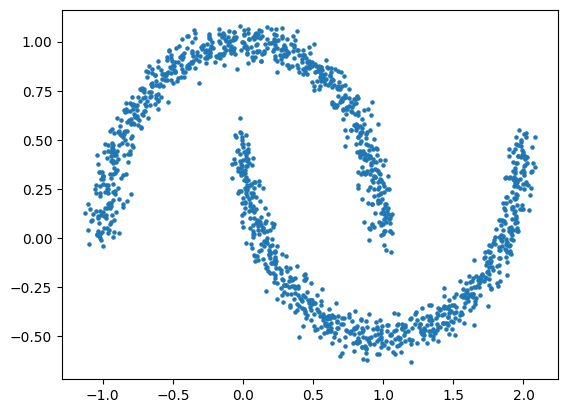

These are the clusters with DBSCAN!


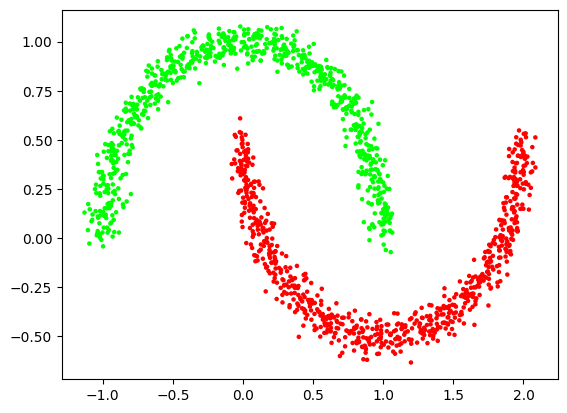

These are the clusters with KMeans!


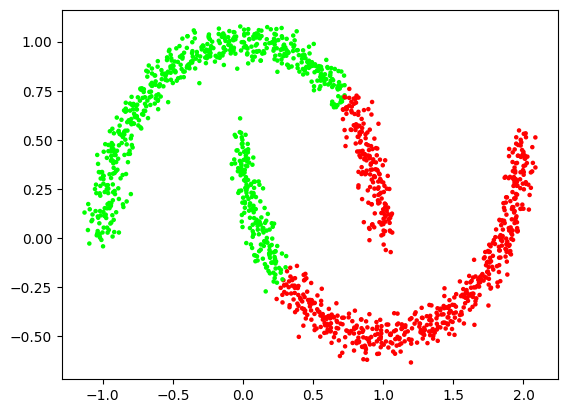

In [20]:
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn import datasets
import numpy as np

X,y = datasets.make_moons(n_samples=1500, noise=.05)

x1 = X[:,0]
x2 = X[:,1]

print("This is the dataset we want to classify with DBSCAN!")
plt.scatter(x1,x2,s=5)
plt.show()

#results with DBSCAN algorithm
dbscan = DBSCAN(eps=0.1)
dbscan.fit(X)
y_pred = dbscan.labels_.astype(int)

colors = np.array(['#ff0000', '#00ff00'])

print("These are the clusters with DBSCAN!")
plt.scatter(x1,x2,s=5,color=colors[y_pred])
plt.show()

#results with K-Means Clustering
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.labels_.astype(int)

colors = np.array(['#ff0000', '#00ff00'])

print("These are the clusters with KMeans!")
plt.scatter(x1,x2,s=5,color=colors[y_pred])
plt.show()

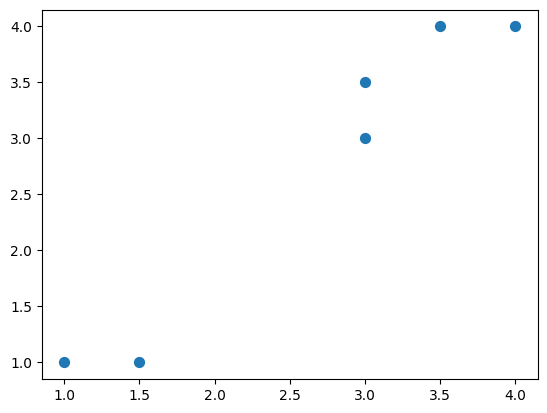

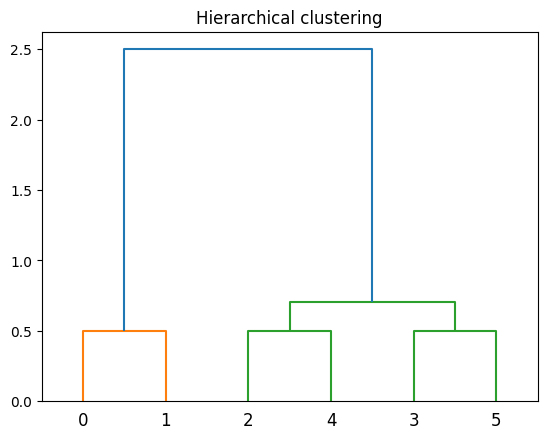

In [24]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

x = np.array([[1,1],[1.5,1],[3,3],[4,4],[3,3.5],[3.5,4]])
plt.scatter(x[:,0],x[:,1],s=50)

plt.show()

linkage_matrix = linkage(x, "single")

dendrogram = dendrogram(linkage_matrix,truncate_mode='none')

plt.title("Hierarchical clustering")

plt.show()